In [124]:
import pandas as pd 
import numpy as np 
import string 
import re 
import string 
import nltk 
from sklearn.metrics import confusion_matrix 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns 
import matplotlib.pyplot as plt 

# First Task

In [45]:
# stop words 
stop_words = set(stopwords.words('english'))

In [86]:
# load dataset 
dataset = pd.read_csv('training.csv',encoding='latin-1')
dataset.columns = ['target','t_id','created_at','query','user','text']
dataset.head()

,target,t_id,created_at,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [89]:
# taking random sample from datset 
data = dataset.sample(n=1000,random_state=42)
data.head()

,target,t_id,created_at,query,user,text
541200,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...
750,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,I'm off too bed. I gotta wake up hella early t...
766711,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,I havent been able to listen to it yet My spe...
285055,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,now remembers why solving a relatively big equ...
705995,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,"Ate too much, feel sick"


In [90]:
# remove unwanted columns from dataset 
data = data[[x for x in data.columns if x not in ['t_id','create_at','query','user']]]
data.head()

,target,created_at,text
541200,0,Tue Jun 16 18:18:13 PDT 2009,@Nkluvr4eva My poor little dumpling In Holmde...
750,0,Mon Apr 06 23:11:18 PDT 2009,I'm off too bed. I gotta wake up hella early t...
766711,0,Tue Jun 23 13:40:12 PDT 2009,I havent been able to listen to it yet My spe...
285055,0,Mon Jun 01 10:26:09 PDT 2009,now remembers why solving a relatively big equ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,"Ate too much, feel sick"


In [91]:
# preprocess data 
def preprocess(tweet):
    tweet = tweet.lower()
    # remove urls 
    tweet = re.sub('http\S+|www\S+|https|S+','',tweet)
    # remove '@' tags and '#' from tweet 
    tweet = re.sub('\@\w+|\#','',tweet)
    # remove punctuations 
    tweet = tweet.translate(str.maketrans('','',string.punctuation))
    # remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [x for x in tweet_tokens if x not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w,pos='a') for w in filtered_words]
    return ' '.join(lemma_words)

In [92]:
data['text'] = data['text'].apply(preprocess)
data.head()

,target,created_at,text
541200,0,Tue Jun 16 18:18:13 PDT 2009,poor little dumpling holmdel vids really tryin...
750,0,Mon Apr 06 23:11:18 PDT 2009,im bed got ta wake hella early tomorrow morning
766711,0,Tue Jun 23 13:40:12 PDT 2009,havent able listen yet speakers busted
285055,0,Mon Jun 01 10:26:09 PDT 2009,remembers solving relatively big equation two ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,ate much feel sick


In [93]:
# vectorizing feature data 'text' 
vector = TfidfVectorizer()
X = vector.fit_transform(data.text)
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
# splitting data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,data.target.ravel(),
                                                    random_state=42,
                                                    test_size=0.2)

In [104]:
# logistic regression 
model = LogisticRegression()
# training model 
model.fit(X_train,y_train)

LogisticRegression()

In [105]:
print(X_train.shape)
print(y_train.shape)

(800, 3022)
(800,)


In [108]:
# making predictiosn 
test_pred = model.predict(X_test)
test_pred

array([4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0,
       4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 4, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4,
       0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0,
       0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4,
       4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0,
       4, 0], dtype=int64)

In [115]:
# compairing predicted values with actual values 
preds = pd.DataFrame({'target_actual':y_test,
                      'target_pred':model.predict(X_test)})
preds.head()

,target_actual,target_pred
0,0,4
1,4,4
2,4,0
3,4,4
4,0,4


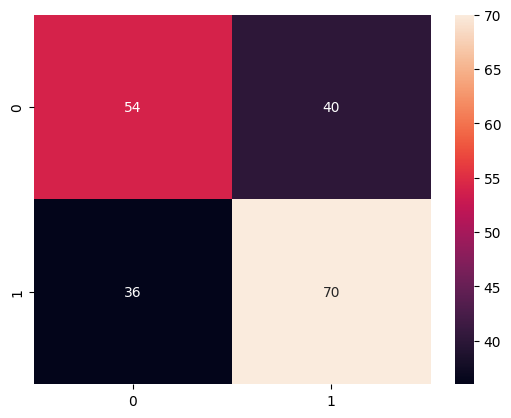

In [125]:
sns.heatmap(confusion_matrix(y_test,test_pred),
            annot=True)
plt.show()

In [136]:
print(model.score(X_test,y_test)*100)

62.0


## Second Task 

In [186]:
from nltk.corpus import twitter_samples
from nltk.stem import WordNetLemmatizer

In [187]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [188]:
# tokenizing documents 
pos_tokens = twitter_samples.tokenized('positive_tweets.json')
neg_tokens = twitter_samples.tokenized('negative_tweets.json')
text_tokens = twitter_samples.tokenized('tweets.20150430-223406.json')
# pos taging tokenized documents
pos_pos = [nltk.pos_tag(x) for x in pos_tokens]
pos_neg = [nltk.pos_tag(x) for x in neg_tokens]
pos_text = [nltk.pos_tag(x) for x in text_tokens]

In [196]:
def lemma(tokens):
    lemmatizer = WordNetLemmatizer()
    lem_sent = []
    for word, tag in nltk.pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else :
            pos = 'a'
        lem_sent.append(lemmatizer.lemmatize(word,pos))
    return lem_sent


['#FollowFriday',
 '@France_Inte',
 '@PKuchly57',
 '@Milipol_Paris',
 'for',
 'be',
 'top',
 'engage',
 'member',
 'in',
 'my',
 'community',
 'this',
 'week',
 ':)']

In [191]:
pos_pos

[[('#FollowFriday', 'JJ'),
  ('@France_Inte', 'NNP'),
  ('@PKuchly57', 'NNP'),
  ('@Milipol_Paris', 'NNP'),
  ('for', 'IN'),
  ('being', 'VBG'),
  ('top', 'JJ'),
  ('engaged', 'VBN'),
  ('members', 'NNS'),
  ('in', 'IN'),
  ('my', 'PRP$'),
  ('community', 'NN'),
  ('this', 'DT'),
  ('week', 'NN'),
  (':)', 'NN')],
 [('@Lamb2ja', 'NN'),
  ('Hey', 'NNP'),
  ('James', 'NNP'),
  ('!', '.'),
  ('How', 'NNP'),
  ('odd', 'JJ'),
  (':/', 'NNP'),
  ('Please', 'NNP'),
  ('call', 'VB'),
  ('our', 'PRP$'),
  ('Contact', 'NNP'),
  ('Centre', 'NNP'),
  ('on', 'IN'),
  ('02392441234', 'CD'),
  ('and', 'CC'),
  ('we', 'PRP'),
  ('will', 'MD'),
  ('be', 'VB'),
  ('able', 'JJ'),
  ('to', 'TO'),
  ('assist', 'VB'),
  ('you', 'PRP'),
  (':)', 'VBP'),
  ('Many', 'JJ'),
  ('thanks', 'NNS'),
  ('!', '.')],
 [('@DespiteOfficial', 'JJ'),
  ('we', 'PRP'),
  ('had', 'VBD'),
  ('a', 'DT'),
  ('listen', 'VBN'),
  ('last', 'JJ'),
  ('night', 'NN'),
  (':)', 'NN'),
  ('As', 'IN'),
  ('You', 'PRP'),
  ('Bleed', 'VBP'